# Otsu algorithm

Import the necessary libraries

In [62]:
import math              
import numpy as np       
from matplotlib import pyplot as plt   
from PIL import Image 

In order to implement the algorithm, we are gonna use a dictionary to store the threshold values for each pixel intensity, and a histogram list.

In [63]:
threshold_values = {}
threshold_values_between = {}
h_list = [1]

Also, we need to load the image, convert it to grayscale and then save it as a numpy array.

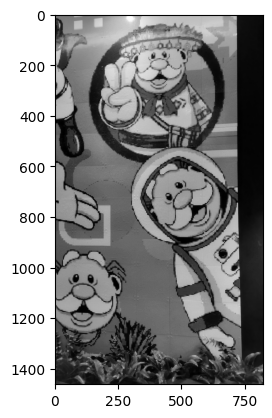

In [74]:
image=Image.open("img.jpg").convert("L")
image_numpy = np.asarray(image)
plt.imshow(image_numpy, cmap='gray')



Now, we are gonna compute the histogram of the image. Then, we are going to save it in the variable H_list-

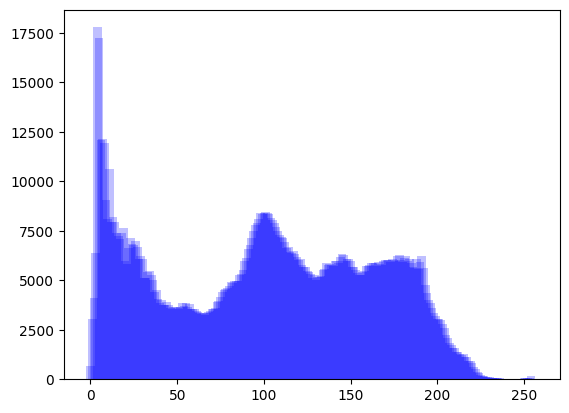

In [65]:
row, col = image_numpy.shape
    
y = np.zeros(256)
    
for i in range(0, row):
    for j in range(0, col):
        y[image_numpy[i, j]] += 1
    
# Plot the histogram
x = np.arange(0, 256)  
plt.bar(x, y, color='b', width=5, align='center', alpha=0.25)  
plt.show()  
    
h_list = y

We want to maximize the variance between the classes, and minimize the in-class variance.
A class is a set of pixels belonging to a region.



In order to implement the Otsu's Method, we need to define some functions to calculate the weight of pixels, the mean pixel intensity and the variance of a class.

In [66]:
def weight_pix(s, e):
    w = 0
    
    for i in range(s, e):
        w += h_list[i]
    return w

def mean_pix(s, e):
    m = 0
    w = weight_pix(s, e)

    for i in range(s, e):
        m += h_list[i] * i
    return m / float(w)

def variance_pix(s, e):
    v = 0
    m = mean_pix(s, e)
    w = weight_pix(s, e)

    for i in range(s, e):
        v += ((i - m) ** 2) * h_list[i]
    v /= w
    return v

Also, to implement the method it is necessary to count pixels in the histogram

In [67]:
def countPixel(h):
    c = 0
    for i in range(0, len(h)):
        if h_list[i] > 0:
           c += h_list[i]
    return c

Finally, we are going to calculate the variance, weight and mean for the background and foreground class.

In [68]:
cnt = countPixel(h_list)

# Loop through each possible threshold value from 1 to 255 (as h has 256 bins, one for each intensity level)
for i in range(1, len(h_list)):

    # Compute the variance, weight, and mean for the "background" class
    v_back = variance_pix(0, i)
    w_back = weight_pix(0, i) / float(cnt)
    m_back = mean_pix(0, i)
    
    # Compute the variance, weight, and mean for the "foreground" class 
    v_fore = variance_pix(i, len(h_list))
    w_fore = weight_pix(i, len(h_list)) / float(cnt)
    m_fore = mean_pix(i, len(h_list))
   
    # Compute within-class variance (within_variance) 
    within_variance = w_back * (v_back) + w_fore * (v_fore)
    
    # Compute between-class variance (between_variance) 
    between_variance = w_back * w_fore * (m_back - m_fore)**2
        
          
    if not math.isnan(within_variance):
        threshold_values[i] = within_variance

    if not math.isnan(between_variance):
        threshold_values_between[i] = between_variance

In [69]:
threshold_values

{1: 3813.482841148412,
 2: 3787.9548305126805,
 3: 3754.293600321432,
 4: 3702.36627273106,
 5: 3557.8340099998304,
 6: 3416.292624260035,
 7: 3316.520008227234,
 8: 3216.1669122199305,
 9: 3117.341603267278,
 10: 3042.442066203817,
 11: 2976.0686535258214,
 12: 2889.3014484437067,
 13: 2824.3536877372694,
 14: 2757.8650946962603,
 15: 2694.0628884941843,
 16: 2634.9822725331865,
 17: 2577.5770481006184,
 18: 2521.853282367529,
 19: 2464.1731243602394,
 20: 2405.0825506171577,
 21: 2359.1647459721203,
 22: 2315.0651540547674,
 23: 2265.0241954867806,
 24: 2211.5970062290985,
 25: 2161.066871711388,
 26: 2111.5138155891204,
 27: 2060.8355316858137,
 28: 2012.5888526413612,
 29: 1969.2121617955263,
 30: 1925.2835167667329,
 31: 1883.1187433922314,
 32: 1847.7834487109883,
 33: 1813.0549622972974,
 34: 1776.744778412167,
 35: 1740.5356183367767,
 36: 1706.116822096414,
 37: 1674.1148321434746,
 38: 1646.1910924759206,
 39: 1618.1473396600645,
 40: 1593.4837232343841,
 41: 1570.40211057224

Then, we are going to select the threshold which minimize the within classes variance.

In [70]:
min_within_variance = min(threshold_values.values())
optimal_threshold = [k for k, v in threshold_values.items() if v == min_within_variance]
print('optimal threshold', optimal_threshold[0])
optim_threshold = optimal_threshold[0]



optimal threshold 94


Now, let´s calculate the optimal threshold that maximizes the between class variance:


In [71]:
max_within_variance_between = max(threshold_values_between.values())
optimal_threshold = [k for k, v in threshold_values_between.items() if v == max_within_variance_between]
print('optimal threshold', optimal_threshold[0])
optim_threshold_between = optimal_threshold[0]

optimal threshold 94


Finally, we are going to restore the picture using the calculated optimal threshold

In [72]:
row, col = image_numpy.shape 
y = np.zeros((row, col))
for i in range(0, row):
    for j in range(0, col):
        if image_numpy[i, j] >= optim_threshold:
            y[i, j] = 255
        else:
            y[i, j] = 0
result = y

We plot the result, and save the image for the future activities.

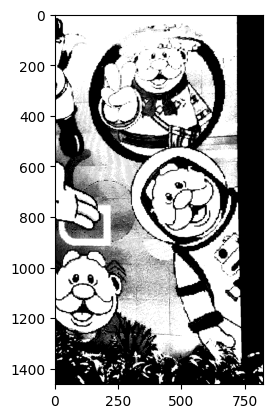

In [73]:
plt.imshow(result, cmap='gray')
plt.savefig("otsu.jpg")
